In this notebook, we will try to focus in the Colombian dynamic to be able to determine the virus mobility as well as it's R factor depending on different local factors. The use of this notebook is diagnosis on the effectivness of certain measures on the R factor as well as. 

In [1]:
#Los clasicos
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd # para leer datos
import sklearn.manifold
import glob
import random
 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import check_random_state
from sklearn.metrics import f1_score
import torch
#Ejercicio 16
import sklearn.metrics
import sklearn.tree
#Ejercicio 24
from sklearn.linear_model import LogisticRegression
import sklearn.neural_network
#Ejercicio 20, clusters umap
import sklearn.cluster
#Ejercicio 17
import sklearn.ensemble # para el random forest

#Puede ser interesante el ejercicio 8 para fitear usando bayes, 7 con MCMH .


One of the biggest problems is to organize our data. The Uncover library has a TON of data. Let's try to make out some cateogries. 

In [2]:
folderset = [folder for folder in glob.glob("Uncover/" + "**/", recursive=True)]
mobility = [folderset[10], folderset[13], folderset[2]]
ressources = [folderset[1]]
healthcareData = [folderset[7],folderset[11]]
covidData = [folderset[3],folderset[4],folderset[5],folderset[6],folderset[8],folderset[9],folderset[12]]
OtherFacilities = [folderset[14]]

csv_Mobility = []
csv_ressources = []
csv_health = []
csv_covid = []
csv_otherFacilities = []

In [3]:
#Mobility
print("\n Mobility \n")
num_carpetas = len(mobility)
for i in range(num_carpetas):
    folder_here = mobility[i] + '*'
    for name in glob.glob(folder_here):
        print(name)
        csv_Mobility.append(name)
#ressources
print("\n Ressources \n")
num_carpetas = len(ressources)
for i in range(num_carpetas):
    folder_here = ressources[i] + '*'
    for name in glob.glob(folder_here):
        print(name)
        csv_ressources.append(name)
#Healthcare
print("\n Healthcare Data \n")
num_carpetas = len(healthcareData)
for i in range(num_carpetas):
    folder_here = healthcareData[i] + '*'
    for name in glob.glob(folder_here):
        print(name)
        csv_health.append(name)
#Covid 
print("\n Covid \n")
num_carpetas = len(covidData)
for i in range(num_carpetas):
    folder_here = covidData[i] + '*'
    for name in glob.glob(folder_here):
        print(name)
        csv_covid.append(name)
#OtherFacilities
print("\n OtherFacilities \n")
num_carpetas = len(OtherFacilities)
for i in range(num_carpetas):
    folder_here = OtherFacilities[i] + '*'
    for name in glob.glob(folder_here):
        print(name)
        csv_otherFacilities.append(name)
                
#We realize that the the school file should be in OtherFacilities

csv_otherFacilities.append(csv_covid.pop(3))

print(csv_otherFacilities)


 Mobility 

Uncover/geotab/border-wait-times-at-us-canada-border.csv
Uncover/geotab/airport-traffic-analysis.csv
Uncover/google_mobility/regional-mobility.csv
Uncover/google_mobility/us-mobility.csv
Uncover/un_world_food_programme/world-travel-restrictions.csv

 Ressources 

Uncover/hifld/us-ports-of-entry.csv
Uncover/hifld/nursing-homes.csv
Uncover/hifld/hospitals.csv
Uncover/hifld/local-emergency-operations-centers-eoc.csv
Uncover/hifld/public-health-departments.csv
Uncover/hifld/urgent-care-facilities.csv
Uncover/hifld/aircraft-landing-facilities.csv

 Healthcare Data 

Uncover/oecd/health-care-utilization.csv
Uncover/oecd/influenza-vaccination-rates.csv
Uncover/us_cdc/nutrition-physical-activity-and-obesity-behavioral-risk-factor-surveillance-system.csv
Uncover/us_cdc/500-cities-census-tract-level-data-gis-friendly-format-2019-release.csv
Uncover/us_cdc/global-tobacco-surveillance-system-gtss-global-youth-tobacco-survey-gyts.csv
Uncover/us_cdc/global-tobacco-surveillance-system-gt

Now it is possible to attack one problem at the time. Let's start by finding and visualization the Colombian Data. 

(9, 350) (9, 350) (9, 350) (9, 350)


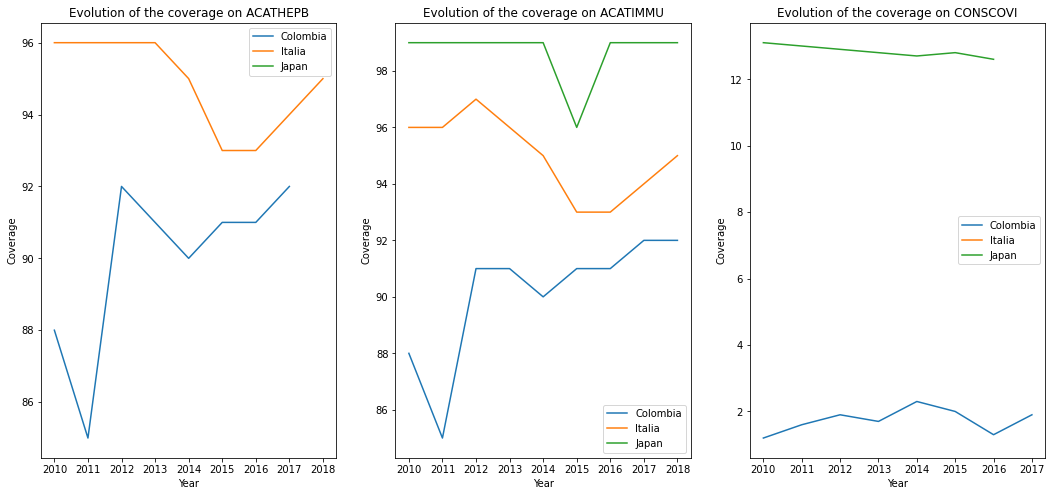

In [4]:
#HealthCare Utilization
WorldHC = pd.read_csv(csv_health[0])
colombianHC = WorldHC[WorldHC['country'] == 'Colombia']
italianHC = WorldHC[WorldHC['country'] == 'Italy']
japanHC = WorldHC[WorldHC['country'] == 'Japan']
variables=WorldHC['var'].unique()
Mundo = pd.DataFrame(columns= variables)
ColombiaHC = pd.DataFrame(columns= variables)
ItaliaHC = pd.DataFrame(columns= variables)
JapanHC = pd.DataFrame(columns= variables)
#WorldAveg, Colombian and Italian
for i in range(9):
    anio = 2010+i
    year = WorldHC[WorldHC['year'] == anio]
    by_var = year.groupby('var')
    new_row = pd.Series(data=by_var.median()['value'], name=anio)
    Mundo = Mundo.append(new_row)
    
    yearC = colombianHC[colombianHC['year'] == anio]
    by_varC = yearC.groupby('var')
    new_rowC = pd.Series(data=by_varC.median()['value'], name=anio)
    ColombiaHC = ColombiaHC.append(new_rowC)
    
    yearI = italianHC[italianHC['year'] == anio]
    by_varI = yearI.groupby('var')
    new_rowI = pd.Series(data=by_varI.median()['value'], name=anio)
    ItaliaHC = ItaliaHC.append(new_rowI)
    
    yearJ = japanHC[japanHC['year'] == anio]
    by_varJ = yearJ.groupby('var')
    new_rowJ = pd.Series(data=by_varJ.median()['value'], name=anio)
    JapanHC = JapanHC.append(new_rowJ)
print(np.shape(Mundo),np.shape(ColombiaHC),np.shape(ItaliaHC ), np.shape(JapanHC))

plt.figure(figsize=(18, 8))
anios = list(Mundo.index) 
for i in range(3):
    graficaremos =['ACATHEPB', 'ACATIMMU', 'CONSCOVI']
    plt.subplot(1,3,i+1)
    plt.plot(anios,ColombiaHC[graficaremos[i]], label='Colombia')
    plt.plot(anios,ItaliaHC[graficaremos[i]], label='Italia')
    plt.plot(anios,JapanHC[graficaremos[i]], label='Japan')
    plt.legend()
    plt.xlabel('Year')
    plt.ylabel('Coverage')
    plt.title('Evolution of the coverage on {}'.format(graficaremos[i]))


(63, 6) (63, 6) (63, 6)


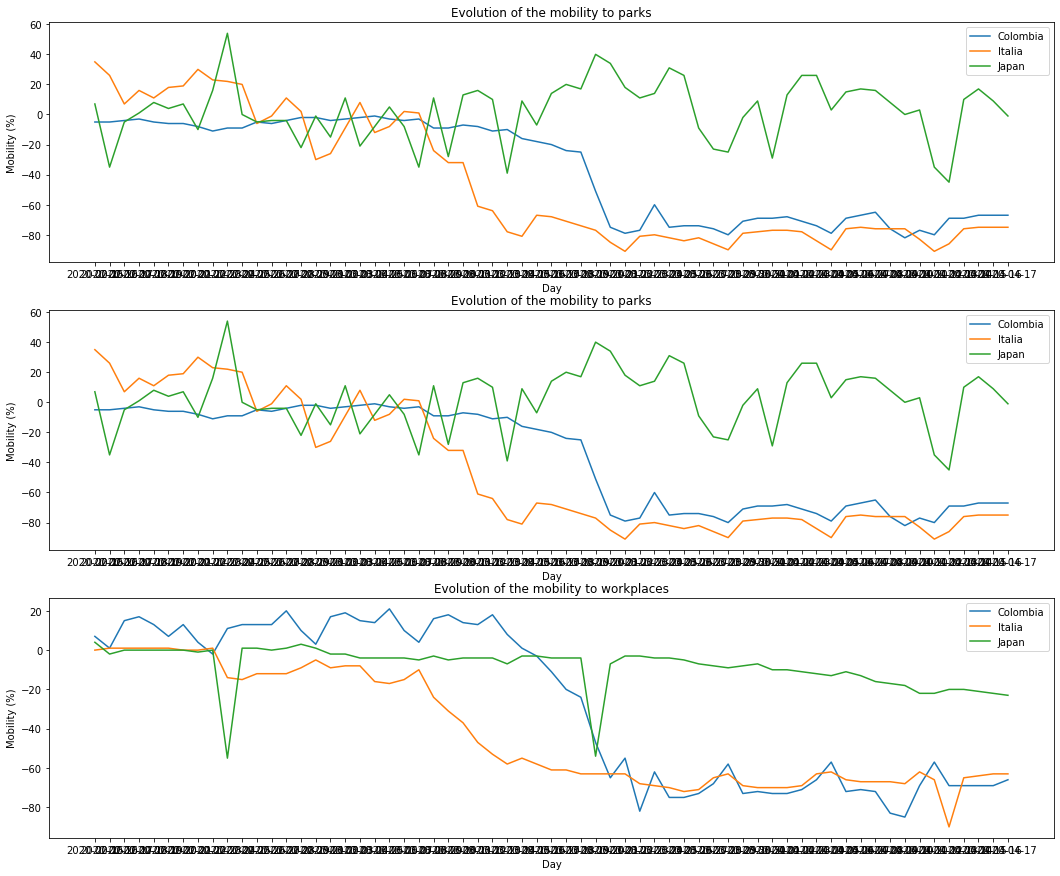

In [5]:

#Mobility
WorldM = pd.read_csv(csv_Mobility[2])
movs = list(WorldM.keys())[3::]
colombianM = WorldM[WorldM['country'] == 'Colombia']
colombianM = colombianM[colombianM['region'] == 'Total']
italianM = WorldM[WorldM['country'] == 'Italy']
italianM = italianM[italianM['region'] == 'Total']
japanM = WorldM[WorldM['country'] == 'Japan']
japanM = japanM[japanM['region'] == 'Total']
colombianM = colombianM.set_index("date", drop = False)
italianM = italianM.set_index("date", drop = False)
japanM = japanM.set_index("date", drop = False)
colombianM = colombianM[movs]
italianM = italianM[movs]
japanM = japanM[movs]
print(np.shape(colombianM),np.shape(italianM),np.shape(japanM))

plt.figure(figsize=(18, 15))
Fechas = list(colombianM.index) 
for i in range(3):
    graficaremos = random.choice(movs)
    plt.subplot(3,1,i+1)
    plt.plot(Fechas,colombianM[graficaremos], label='Colombia')
    plt.plot(Fechas,italianM[graficaremos], label='Italia')
    plt.plot(Fechas,japanM[graficaremos], label='Japan')
    plt.legend()
    plt.xlabel('Day')
    plt.ylabel('Mobility (%)')
    plt.title('Evolution of the mobility to {}'.format(graficaremos))


We don't have so much data, but it is enough to try. We shall try to evaluate two types of results. One will be the number of contamination by test taken, the other will be the date rate. Colombia should be more thorough in the colected data. <br>
For this part we have to understand that we are handeling a lot of datasets that report the same. We need to have a data sets on the tests made, on the cases reported and the deaths. 


Tests data source <br>
Uncover/our_world_in_data/covid-19-testing-all-observations.csv <br>
<br>
Covid cases, deaths, etc <br>
Uncover/our_world_in_data/coronavirus-disease-covid-19-statistics-and-research.csv <br>



(69, 3) (69, 3) (69, 3)
(121, 5) (121, 5) (121, 5)


Text(0.5, 1.0, 'Evolution of the COVID deaths')

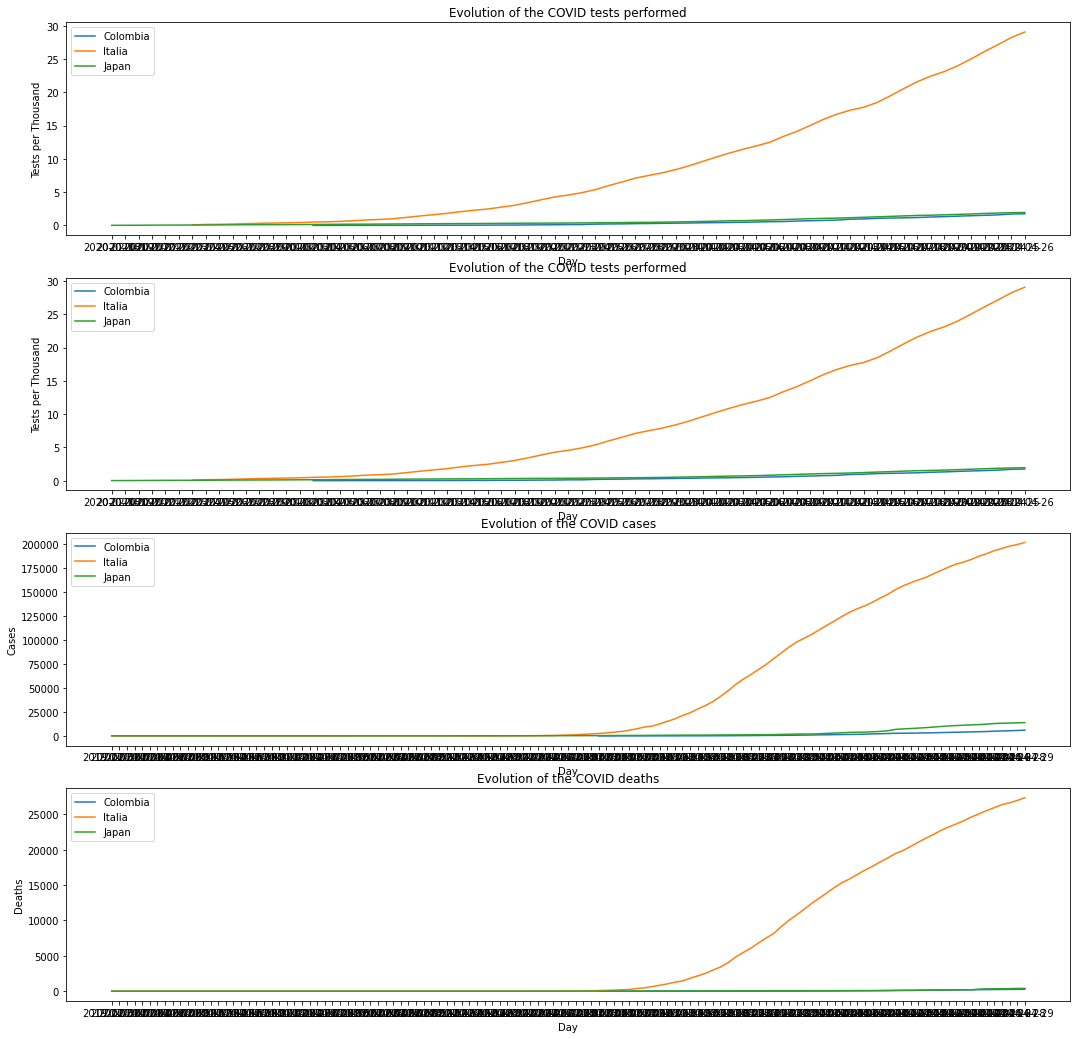

In [6]:

#COVID-19 
WorldTests = pd.read_csv(csv_covid[19])
WorldCases2 = pd.read_csv(csv_covid[17])
#As we have different starting dates for each country we have to merge the resulting dataframes to be able to obtain a correct display of the datas. 
#Tests
dats = ['cumulative_total','cumulative_total_per_thousand', 'daily_change_in_cumulative_total_per_thousand',]
colombianT = WorldTests[WorldTests['entity'] == 'Colombia - samples processed']
italianT = WorldTests[WorldTests['entity'] == 'Italy - tests performed']
japanT = WorldTests[WorldTests['entity'] == 'Japan - tests performed']
colombianT = colombianT.set_index("date", drop = False)
italianT = italianT.set_index("date", drop = False)
japanT = japanT.set_index("date", drop = False)
colombianT = colombianT[dats]
italianT = italianT[dats]
japanT = japanT[dats]

Tests = japanT.join(italianT.join(colombianT, lsuffix='_ITA', rsuffix='_COL'), lsuffix='_JPN',  rsuffix='')
dats1 = list(map(lambda x: str(x)+'_COL', dats))
dats2 = list(map(lambda x: str(x)+'_ITA', dats))
#dats3 = list(map(lambda x: str(x)+'_JPN', dats))
colombianTest = Tests[dats1]
italianTest = Tests[dats2]
japanTest = Tests[dats]
print(np.shape(colombianTest),np.shape(italianTest),np.shape(japanTest) )

#Cases and Deaths

dat = ['total_cases','total_deaths', 'total_cases_per_million', 'total_deaths_per_million','new_cases_per_million']
colombianCD2 = WorldCases2[WorldCases2['iso_code'] == 'COL']
italianCD2 = WorldCases2[WorldCases2['iso_code'] == 'ITA']
japanCD2 = WorldCases2[WorldCases2['iso_code'] == 'JPN']
colombianCD2 = colombianCD2.set_index("date", drop = False)
italianCD2 = italianCD2.set_index("date", drop = False)
japanCD2 = japanCD2.set_index("date", drop = False)

colombianCD2 = colombianCD2[dat]
italianCD2 = italianCD2[dat]
japanCD2 = japanCD2[dat]

COVID = japanCD2.join(italianCD2.join(colombianCD2, lsuffix='_ITA', rsuffix='_COL'),lsuffix='_JPN', rsuffix = '')
dat1 = list(map(lambda x: str(x)+'_COL', dat))
dat2 = list(map(lambda x: str(x)+'_ITA', dat))
#dat3 = list(map(lambda x: str(x)+'_JPN', dat))
colombianCOVID = COVID[dat1]
italianCOVID = COVID[dat2]
japanCOVID = COVID[dat]
print(np.shape(colombianCOVID),np.shape(italianCOVID), np.shape(japanCOVID) )

plt.figure(figsize=(18, 18))
plt.subplot(4,1,1)
FechasT = list(Tests.index)
plt.plot(FechasT,Tests['cumulative_total_per_thousand_COL'], label='Colombia')
plt.plot(FechasT,Tests['cumulative_total_per_thousand_ITA'], label='Italia')
plt.plot(FechasT,Tests['cumulative_total_per_thousand'], label='Japan')
plt.legend()
plt.xlabel('Day')
plt.ylabel('Tests per Thousand')
plt.title('Evolution of the COVID tests performed')
          
plt.subplot(4,1,2)
plt.plot(FechasT,Tests['cumulative_total_per_thousand_COL'], label='Colombia')
plt.plot(FechasT,Tests['cumulative_total_per_thousand_ITA'], label='Italia')
plt.plot(FechasT,Tests['cumulative_total_per_thousand'], label='Japan')
plt.legend()
plt.xlabel('Day')
plt.ylabel('Tests per Thousand')
plt.title('Evolution of the COVID tests performed')
       
plt.subplot(4,1,3)
Fechas = list(COVID.index)
plt.plot(Fechas,COVID['total_cases_COL'], label='Colombia')
plt.plot(Fechas,COVID['total_cases_ITA'], label='Italia')
plt.plot(Fechas,COVID['total_cases'], label='Japan')
plt.legend()
plt.xlabel('Day')
plt.ylabel('Cases')
plt.title('Evolution of the COVID cases')     
    
plt.subplot(4,1,4)
plt.plot(Fechas,COVID['total_deaths_COL'], label='Colombia')
plt.plot(Fechas,COVID['total_deaths_ITA'], label='Italia')
plt.plot(Fechas,COVID['total_deaths'], label='Japan')
plt.legend()
plt.xlabel('Day')
plt.ylabel('Deaths')
plt.title('Evolution of the COVID deaths')


Let's reunite all the different matrixes to one big matrix for each country. For the health care we will take the 2017 indicator constant on each day. All nan will be replace for 0, this is correct as mobility is
a porcentage change (it is then correct to assume that before the pandemic there was bearly a change) and for cases and deaths it is obvious.


In [9]:

#This allows to select the health indicators we have for all three countries. 
ColombiaHC1 = ColombiaHC.drop(2018, axis=0)
ColombiaHC1 = ColombiaHC1.dropna(axis = 1)
Colombs = list(ColombiaHC1.keys())
ItaliaHC1 = ItaliaHC[Colombs]
ItaliaHC1 = ItaliaHC1.drop(2018, axis=0)
ItaliaHC1 = ItaliaHC1.dropna(axis = 1)
JapanHC1 = JapanHC[Colombs]
JapanHC1 = JapanHC1.drop(2018, axis=0)
JapanHC1 = JapanHC1.dropna(axis = 1)
Japans = list(JapanHC1.keys())
ColombiaHC1 = ColombiaHC1[Japans]
ItaliaHC1 = ItaliaHC1[Japans]
#Now we unite the COVID and Mobility matrixes
Colombia = colombianCOVID.join(colombianM)
Italy = italianCOVID.join(italianM)
Japan = japanCOVID.join(japanM)
#We create the health care columns.  
japonsito = pd.DataFrame(columns= Japans)
colombito = pd.DataFrame(columns= Japans)
italianito = pd.DataFrame(columns= Japans)
diasAna = list(Colombia.index)
for i in range(len(diasAna)):
    new_rowJ = pd.Series(data=JapanHC1.loc[2017], name=diasAna[i])
    japonsito = japonsito.append(new_rowJ)
    new_rowC =pd.Series(data=ColombiaHC1.loc[2017], name=diasAna[i])
    colombito = colombito.append(new_rowC)
    new_rowI =pd.Series(data=ItaliaHC1.loc[2017], name=diasAna[i])
    italianito= italianito.append(new_rowI)
#We add the health care columns.
Colombia = Colombia.join(colombito)
Italy = Italy.join(italianito)
Japan = Japan.join(japonsito)
#We replace the nans.
Colombia = Colombia.replace(np.nan,0)
Italy = Italy.replace(np.nan,0)
Japan = Japan.replace(np.nan,0)

Y_CO = np.asarray(Colombia.pop('new_cases_per_million_COL'))
Y_IT = np.asarray(Italy.pop('new_cases_per_million_ITA'))
Y_JP = np.asarray(Japan.pop('new_cases_per_million'))

scaler = sklearn.preprocessing.StandardScaler()
Colombia = scaler.fit_transform(Colombia)
Italy = scaler.fit_transform(Italy)
Japan = scaler.fit_transform(Japan)



Now that we have all the data organized we can work on defining the objetves indicator. <br>
We tried with both TDPM (Total Deaths per Million) and NCPM (New Cases Per Million)


In [63]:
X_new = np.expand_dims(Italy, 1) # necesario para que las dimensiones sean [batch, channel, width]
feature_maps = torch.autograd.Variable(torch.Tensor(X_new).float())
print(feature_maps.size())

n = torch.nn.Conv1d(1, 15, 4, stride=1)
feature_maps = n(feature_maps)
print(feature_maps.size())

n = torch.nn.Conv1d(15, 13, 4, stride=2)
feature_maps = n(feature_maps)
print(feature_maps.size())
n = torch.nn.Conv1d(13, 7, 4, stride=2) # in-channels = 1, out-channels = 10, kernel=8
feature_maps = n(feature_maps)
print(feature_maps.size())

n = torch.nn.Conv1d(7, 6, 1, stride=1)
feature_maps = n(feature_maps)
print(feature_maps.size())




n = torch.nn.Conv1d(6, 1, 1, stride=1)
feature_maps = n(feature_maps)
print(feature_maps.size())

torch.Size([121, 1, 14])
torch.Size([121, 15, 11])
torch.Size([121, 13, 4])
torch.Size([121, 7, 1])
torch.Size([121, 6, 1])
torch.Size([121, 1, 1])


In [15]:
model1 = torch.nn.Sequential(
    torch.nn.Conv1d(1, 10, kernel_size=8, stride=1),
    torch.nn.Conv1d(10, 6, kernel_size=4, stride=1),
    torch.nn.Conv1d(6, 3, kernel_size=1, stride=1),
    torch.nn.Conv1d(3, 1, kernel_size=2, stride=3)
)
model2 = torch.nn.Sequential(
    torch.nn.Conv1d(1, 10, kernel_size=8, stride=1),
     
    torch.nn.Conv1d(10, 6, kernel_size=4, stride=1),
     
    torch.nn.Conv1d(6, 3, kernel_size=1, stride=1),
     
    torch.nn.Conv1d(3, 1, kernel_size=2, stride=3)
)
distance1 = torch.nn.MSELoss()
optimizer1 = torch.optim.Adam(model1.parameters(), lr=0.5, weight_decay=1E-3)


distance2 = torch.nn.MSELoss()
optimizer2 = torch.optim.Adam(model2.parameters(), lr=0.5, weight_decay=1E-3)

epochs = 400

for epoch in range(epochs):
    #Training Italy
    X_new1 = np.expand_dims(Italy, 1) 
    inputs1 = torch.autograd.Variable(torch.Tensor(X_new1).float())
    targets1 = torch.autograd.Variable(torch.Tensor(Y_IT).float())
    
    optimizer1.zero_grad()
    out1 = model1(inputs1)
    out1 = out1.squeeze(dim=1) # necesario para quitar la dimension intermedia de channel
    loss1 = distance1(out1, targets1)
    loss1.backward()
    optimizer1.step()
    #Training Japan
    X_new2 = np.expand_dims(Japan, 1) 
    inputs2 = torch.autograd.Variable(torch.Tensor(X_new2).float())
    targets2 = torch.autograd.Variable(torch.Tensor(Y_JP).float())
    
    optimizer2.zero_grad()
    out2 = model2(inputs2)
    out2 = out2.squeeze(dim=1) # necesario para quitar la dimension intermedia de channel
    loss2 = distance2(out2, targets2)
    loss2.backward()
    optimizer2.step()
    if epoch>(epochs-50):
        print('epoch [{}/{}], loss1:{:.4f} , loss2:{:.4f}  '.format(epoch+1, epochs, loss1.item(),loss2.item()))


epoch [352/400], loss1:1115.6057 , loss2:2.7106  
epoch [353/400], loss1:1115.6042 , loss2:2.7105  
epoch [354/400], loss1:1115.6036 , loss2:2.7105  
epoch [355/400], loss1:1115.6029 , loss2:2.7104  
epoch [356/400], loss1:1115.6024 , loss2:2.7103  
epoch [357/400], loss1:1115.6001 , loss2:2.7103  
epoch [358/400], loss1:1115.5999 , loss2:2.7102  
epoch [359/400], loss1:1115.5988 , loss2:2.7102  
epoch [360/400], loss1:1115.5972 , loss2:2.7101  
epoch [361/400], loss1:1115.5963 , loss2:2.7100  
epoch [362/400], loss1:1115.5955 , loss2:2.7100  
epoch [363/400], loss1:1115.5948 , loss2:2.7099  
epoch [364/400], loss1:1115.5938 , loss2:2.7099  
epoch [365/400], loss1:1115.5928 , loss2:2.7098  
epoch [366/400], loss1:1115.5918 , loss2:2.7098  
epoch [367/400], loss1:1115.5913 , loss2:2.7097  
epoch [368/400], loss1:1115.5901 , loss2:2.7096  
epoch [369/400], loss1:1115.5897 , loss2:2.7096  
epoch [370/400], loss1:1115.5875 , loss2:2.7095  
epoch [371/400], loss1:1115.5872 , loss2:2.7095  


Visualicemos entonces los resultados obtenidos para tanto Italia y Japon, comparando con la real. 

Text(0.5, 1.0, 'Evolution of the COVID')

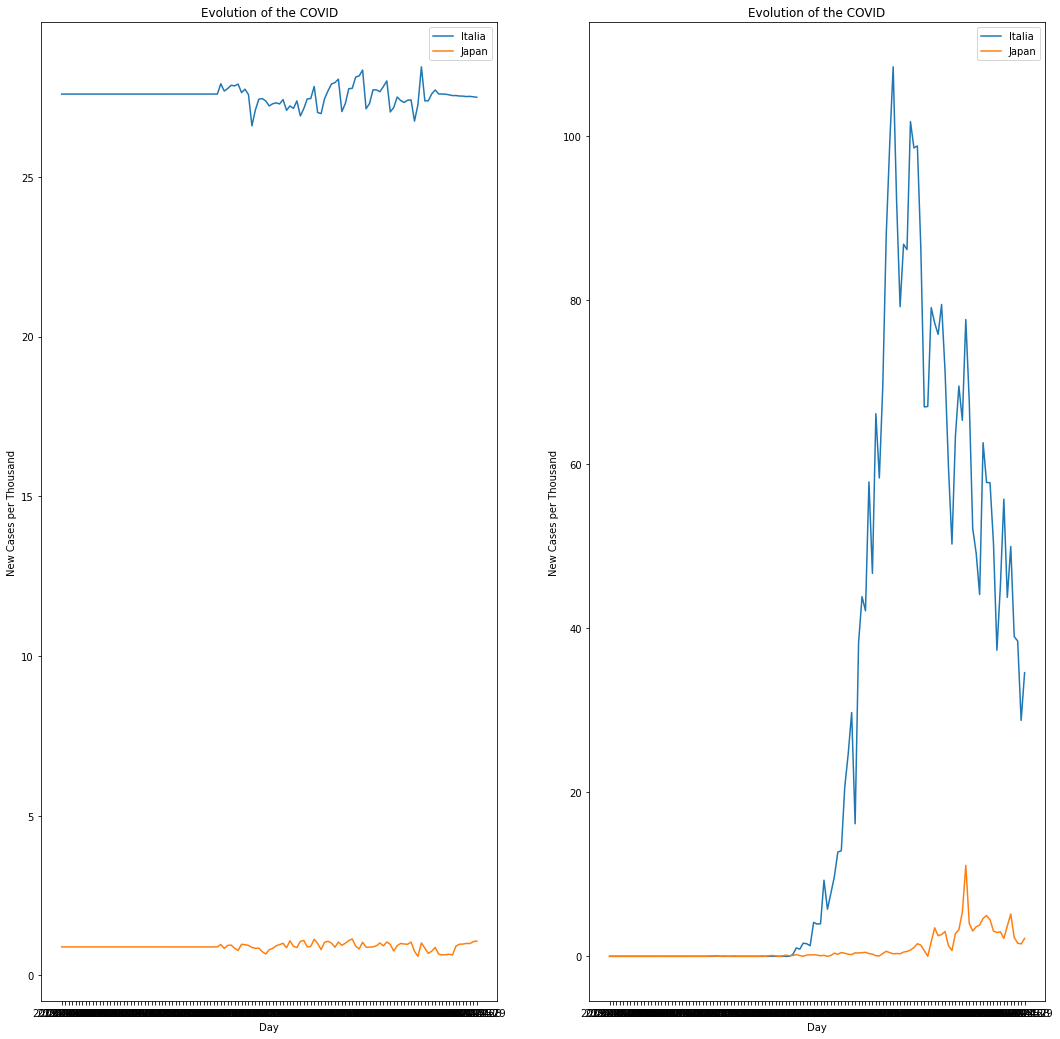

In [24]:
values1, Y_predicted1 = torch.max(out1.data, 1)
values2, Y_predicted2 = torch.max(out2.data, 1)

plt.figure(figsize=(18, 18))
plt.subplot(1,2,1)
plt.plot(Fechas,values1, label='Italia')
plt.plot(Fechas,values2, label='Japan')
plt.legend()
plt.xlabel('Day')
plt.ylabel('New Cases per Thousand')
plt.title('Evolution of the COVID')
          
plt.subplot(1,2,2)
plt.plot(Fechas,Y_IT, label='Italia')
plt.plot(Fechas,Y_JP, label='Japan')
plt.legend()
plt.xlabel('Day')
plt.ylabel('New Cases per Thousand')
plt.title('Evolution of the COVID')

Y ahora para Colombia

In [25]:
#datos
X_new = np.expand_dims(Colombia, 1) 
inputs = torch.autograd.Variable(torch.Tensor(X_new).float())
#Modelo Italia
x_transform_I = model1(inputs)
values_I, Y_predicted_I = torch.max(x_transform_I.data, 1)

#Modelo Japon
x_transform_J = model2(inputs)
values_J, Y_predicted_J = torch.max(x_transform_J.data, 1)

Text(0.5, 1.0, 'Evolution of the COVID')

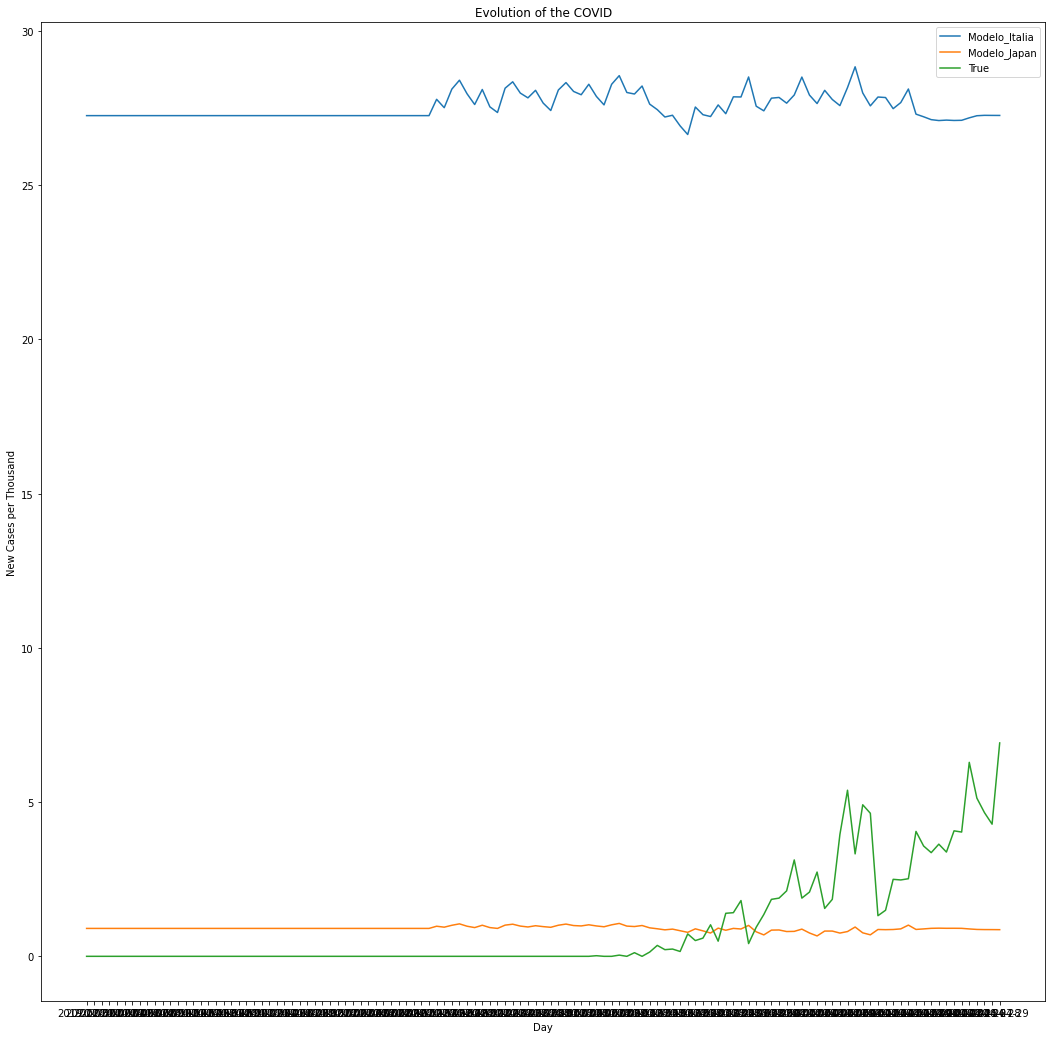

In [26]:
plt.figure(figsize=(18, 18))
plt.plot(Fechas,values_I, label='Modelo_Italia')
plt.plot(Fechas,values_J, label='Modelo_Japan')
plt.plot(Fechas,Y_CO, label='True')
plt.legend()
plt.xlabel('Day')
plt.ylabel('New Cases per Thousand')
plt.title('Evolution of the COVID')
